# Painter Robot Using Genetic Algorithm

## - Diwas Adhikari (076BEI014)

In [1]:
import random ;
import numpy as np ;
import matplotlib.pyplot as plt ;

- The chromosome is of 50*54 dimensions with 50 random chromosomes to evolve over 200 generations.

In [2]:
totalGenerations = 200 ;
populationSize = 50 ;
lengthChromosome = 54 ;
playsPerChromosome = 5 ;

- The dimensions of the empty room to be painted is 20*40 units.

In [3]:
roomWidth = 20 ;
roomHeight = 40 ;
room = [[0 for _ in range(roomWidth)] for _ in range(roomHeight)] ;

- Function to display the room

In [4]:
def showRoom(room):
    cmap = {0: "green", 1: "yellow", 2: "brown"} ;
    plt.figure(figsize=(2,4)) ;
    for y in range(len(room)):
        for x in range(len(room[0])):
            value = room[y][x] ;
            color = cmap[value] ;
            plt.fill_between([x, x + 1], y, y + 1, color=color) ;

    plt.xlim(0, len(room[0])) ;
    plt.ylim(0, len(room)) ;
    plt.gca().invert_yaxis() ;
    plt.axis("off") ;
    plt.show() ;

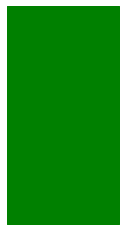

In [5]:
showRoom(room) ;

- Initialize a random population with random chromosomes.

In [6]:
population = [] ;
for i in range(populationSize):
    newChromosome = [np.random.randint(0, 3) for _ in range(lengthChromosome)] ;
    population.append(newChromosome) ;

- Calculate fitness based on the number of tiles it can paint for the room

In [7]:
def calculateFitness(chromosome, room):
    score = 0 ;
    position = [0, 0] ;
    painted = set() ;
    for movement in chromosome:
        if movement == 0:
            newPosition = [position[0], position[1]+1] ;
        elif movement == 1:
            newPosition = [position[0]-1, position[1]] ;
        elif movement == 2:
            newPosition = [position[0]+1, position[1]] ;
        else:
            newPosition = [position[0] + np.random.choice([-1, 1]), position[1]] ;
        # Check if the robot is within bounds
        if (newPosition[0] <= 0 or newPosition[0] >= roomHeight
            or newPosition[1] < 0 or newPosition[1] >= roomWidth):
            continue ;
        # Check if that tile is already painted
        if tuple(newPosition) in painted:
            continue ;
        # Update the scores if it is actually a new tile that is never painted before 
        painted.add(tuple(newPosition)) ;
        score += room[newPosition[0]][newPosition[1]] == 0 ;
        position = newPosition ;
    return score ;

- Use genetic operators to evolve the population

In [8]:
def evolvePopulation(population, room, mutationProbability):
    # Evaluate fitness of each chromosome in the population
    fitness = [] ;
    for chromosome in population:
        totalEfficiency = 0 ;
        for i in range(playsPerChromosome):
            totalEfficiency += calculateFitness(chromosome, room) ;
        avgEfficiency = totalEfficiency/playsPerChromosome ;
        fitness.append(avgEfficiency) ;
    # Selection
    parents = [] ;
    for i in range(populationSize // 2):
        selectionQuota = random.sample(fitness, 5) ;
        selected = fitness.index(max(selectionQuota)) ;
        parents.append(population[selected]) ;
    # Crossover 
    newGeneration = [] ;
    for i in range(populationSize):
        parent1 = random.choice(parents) ;
        parent2 = random.choice(parents) ;
        offsprings = [] ;
        # Use a crossover point to break and swap bits of chromosome
        crossoverPoint = np.random.randint(0, lengthChromosome) ;
        for j in range(lengthChromosome):
            if j <= crossoverPoint:
                offsprings.append(parent1[j]) ;
            else:
                offsprings.append(parent2[j]) ;
            # Mutation
            if np.random.random() < mutationProbability:
                offsprings[j] = random.randint(0, 3) ;
        newGeneration.append(offsprings) ;
    return newGeneration ;

In [9]:
# Perform evolution over multiple generations
def geneticTraining(population, room, mutationProbability, totalGenerations):
    for generation in range(totalGenerations):
        population = evolvePopulation(population, room, mutationProbability) ;
        fitness = [] ;
        for chromosome in population:
            x = calculateFitness(chromosome, room) ;
            fitness.append(x) ;
        averageFitness = sum(fitness)/len(fitness) ;
        print("Generation", generation, "-> Average fitness :", averageFitness) ;
    return population ;

In [10]:
population = geneticTraining(population, room, 0.025, totalGenerations) ;

Generation 0 -> Average fitness : 40.06
Generation 1 -> Average fitness : 42.68
Generation 2 -> Average fitness : 44.26
Generation 3 -> Average fitness : 45.64
Generation 4 -> Average fitness : 46.4
Generation 5 -> Average fitness : 46.96
Generation 6 -> Average fitness : 47.8
Generation 7 -> Average fitness : 48.24
Generation 8 -> Average fitness : 48.7
Generation 9 -> Average fitness : 49.2
Generation 10 -> Average fitness : 50.0
Generation 11 -> Average fitness : 51.1
Generation 12 -> Average fitness : 50.86
Generation 13 -> Average fitness : 51.04
Generation 14 -> Average fitness : 51.64
Generation 15 -> Average fitness : 51.8
Generation 16 -> Average fitness : 52.02
Generation 17 -> Average fitness : 51.34
Generation 18 -> Average fitness : 52.48
Generation 19 -> Average fitness : 51.98
Generation 20 -> Average fitness : 52.04
Generation 21 -> Average fitness : 52.58
Generation 22 -> Average fitness : 52.94
Generation 23 -> Average fitness : 53.04
Generation 24 -> Average fitness 

In [11]:
maxFitness = -99999 ;
chosenOne = 0 ;
for i, chromosome in enumerate(population):
    x = calculateFitness(chromosome, room) ;
    if x > maxFitness:
        chosenOne = i ;
fittestChromosome = population[chosenOne] ;
print("The fittest chromosome is ", fittestChromosome) ;

The fittest chromosome is  [2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1]


- Use the chromosome to track the path of the robot for plotting it later 

In [12]:
def trackPathInRoom(room, fittestChromosome):
    # '0' is unpainted - '1' is wall - '2' is painted
    robotPosition = [0, 0] ;
    room[0][0] = 2 ;
    for movement in fittestChromosome:
        if movement == 0: # Forward
            if robotPosition[1] >= roomHeight:
                continue ;
            robotPosition[1] += 1 ;
        elif movement == 1: # Left
            if robotPosition[0] <= 0:
                continue ;
            robotPosition[0] -= 1 ;
        elif movement == 2: # Right
            if robotPosition[0] >= roomWidth:
                continue ;
            robotPosition[0] += 1 ;
        else: # Random left or right
            if robotPosition[0] >= roomWidth or robotPosition[0] <= 0:
                continue ;
            robotPosition[0] += np.random.choice([-1, 1]) ;
        room[robotPosition[0]][robotPosition[1]] = 2 ;
    return room ;

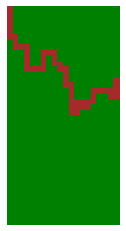

In [13]:
room = trackPathInRoom(room, fittestChromosome) ;
showRoom(room) ;

- Put some obstacles to check the performance of the fittest genome. [Wall -> 1]

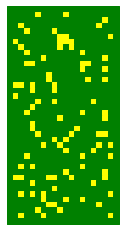

In [14]:
obstacleRoom = [[0 for _ in range(roomWidth)] for _ in range(roomHeight)] ;
for i in range(100):
    posX = np.random.randint(1, roomWidth-1) ;
    posY = np.random.randint(1, roomHeight-1) ;
    obstacleRoom[posY][posX] = 1 ;
showRoom(obstacleRoom) ;

In [15]:
population = geneticTraining(population, obstacleRoom, 0.025, totalGenerations) ;

Generation 0 -> Average fitness : 47.82
Generation 1 -> Average fitness : 48.12
Generation 2 -> Average fitness : 49.08
Generation 3 -> Average fitness : 50.2
Generation 4 -> Average fitness : 50.56
Generation 5 -> Average fitness : 50.4
Generation 6 -> Average fitness : 50.48
Generation 7 -> Average fitness : 50.62
Generation 8 -> Average fitness : 50.7
Generation 9 -> Average fitness : 50.5
Generation 10 -> Average fitness : 50.84
Generation 11 -> Average fitness : 50.44
Generation 12 -> Average fitness : 49.92
Generation 13 -> Average fitness : 50.7
Generation 14 -> Average fitness : 50.62
Generation 15 -> Average fitness : 50.44
Generation 16 -> Average fitness : 50.62
Generation 17 -> Average fitness : 50.46
Generation 18 -> Average fitness : 50.8
Generation 19 -> Average fitness : 50.84
Generation 20 -> Average fitness : 51.1
Generation 21 -> Average fitness : 51.82
Generation 22 -> Average fitness : 51.66
Generation 23 -> Average fitness : 51.66
Generation 24 -> Average fitness 

In [16]:
maxFitness = -99999 ;
chosenOne = 0 ;
for i, chromosome in enumerate(population):
    x = calculateFitness(chromosome, obstacleRoom) ;
    if x > maxFitness:
        chosenOne = i ;
fittestChromosome = population[chosenOne] ;
print("The fittest chromosome is ", fittestChromosome) ;

The fittest chromosome is  [2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1]


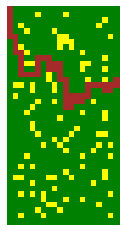

In [17]:
obstacleRoom = trackPathInRoom(obstacleRoom, fittestChromosome) ;
showRoom(obstacleRoom) ;